# Movie Revenue Prediction

## 1. Problem Statement

- In the movie industry, predicting box office revenue before a movie’s release can help production houses, investors, and marketing teams make better decisions.
- The goal of this project is to build a machine learning model that can predict a movie’s expected box office revenue using features such as genre, director, cast, release date, and other metadata.

## 2. Data Description 

#### Dataset Source:
- The dataset used in this project was manually imported from a CSV file containing information on approximately 5,000 movies.

#### Key Variables for Prediction:
- The goal of this project is to predict the BoxOffice revenue using available metadata.

- Genre: Different genres perform differently at the box office.

- Director: Popular or award-winning directors may boost revenue.

- Actors: Famous actors can attract larger audiences.

- IMDb Rating: Higher ratings often indicate better reception.

## 3. Data ingestion 

In [1]:
import pandas as pd
df=pd.read_csv('Movie_5000_dataset.csv')

## 4. Imported libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

## 5. Basic Data Inspection

In [3]:
df.head()

,Title,Year,Director,Actors,Rating,Runtime,Censor,BoxOffice,Genre
0,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,"? 53,48,60,000","Crime, Drama"
1,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,"? 37,78,50,000","Adventure, Drama"
2,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,"? 29,25,80,000","Adventure, Sci-Fi"
3,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,"? 34,25,50,000","Adventure, Drama"
4,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",8.8,178,U,"? 31,55,40,000","Adventure, Drama"


#### Insight:

- Shows the first 5 movie records.

- Helps verify that data was loaded correctly.

In [4]:
df.tail()

,Title,Year,Director,Actors,Rating,Runtime,Censor,BoxOffice,Genre
4203,Epic Movie,2007,"Directors:Jason Friedberg, Aaron Seltzer","Kal Penn, Jennifer Coolidge, Fred Willard, Ada...",2.4,86,U,"? 3,97,40,000","Comedy, Fantasy"
4204,Son of the Mask,2005,Lawrence Guterman,"Jamie Kennedy, Traylor Howard, Alan Cumming, L...",2.2,94,U,"? 1,70,20,000","Family, Fantasy"
4205,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,"? 1,41,90,000",Sci-Fi
4206,From Justin to Kelly,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,"? 49,20,000","Musical, Romance"
4207,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,"? 91,10,000","Family, Sci-Fi"


#### Insight:

- Shows the last 5 movies.

- Verifies consistency of rows throughout the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4208 entries, 0 to 4207
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      4208 non-null   object 
 1   Year       4208 non-null   int64  
 2   Director   4208 non-null   object 
 3   Actors     4208 non-null   object 
 4   Rating     4208 non-null   float64
 5   Runtime    4208 non-null   int64  
 6   Censor     4208 non-null   object 
 7   BoxOffice  4208 non-null   object 
 8   Genre      4208 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 296.0+ KB


#### Insight:

- Most columns are currently of object (string) type, including numeric-looking ones like BoxOffice, Runtime, and Year.

- These will need to be transformed into numeric values before model training.

In [6]:
df.describe(include='all')

,Title,Year,Director,Actors,Rating,Runtime,Censor,BoxOffice,Genre
count,4208,4208.000000,4208,4208,4208.000000,4208.000000,4208,4208,4208
unique,4149,NaN,1716,4164,NaN,NaN,21,3407,134
top,Robin Hood,NaN,Woody Allen,"William Shatner, Leonard Nimoy, DeForest Kelle...",NaN,NaN,UA,"? 11,10,000","Adventure, Comedy"
freq,3,NaN,35,6,NaN,NaN,961,7,266
mean,NaN,2002.271863,NaN,NaN,6.720271,112.169439,NaN,NaN,NaN
std,NaN,13.813256,NaN,NaN,0.900543,20.533427,NaN,NaN,NaN
min,NaN,1921.000000,NaN,NaN,1.500000,63.000000,NaN,NaN,NaN
25%,NaN,1996.000000,NaN,NaN,6.200000,98.000000,NaN,NaN,NaN
50%,NaN,2005.000000,NaN,NaN,6.800000,109.000000,NaN,NaN,NaN
75%,NaN,2012.000000,NaN,NaN,7.300000,122.000000,NaN,NaN,NaN


#### Insight:

- Rating ranges from 1.5 to 9.3 — most movies are rated between 6 and 7.

- Runtime is mostly between 90 to 120 minutes.

- Categorical columns like Genre and Censor have limited unique values and may benefit from encoding.

In [7]:
df.shape

(4208, 9)

#### Insight:
- The dataset has 4,208 rows and 10 columns, which is a good size for machine learning without performance concerns.

## 6. Data Cleaning

In [8]:
import re

def clean_indian_boxoffice(val):
    if pd.isna(val):
        return pd.NA
    val = re.sub(r"[^\d,]", "", str(val))
    val = val.replace(",", "")
    try:
        return int(val)
    except:
        return pd.NA

df["BoxOffice_cleaned"] = df["BoxOffice"].apply(clean_indian_boxoffice)
df.dropna(subset=["BoxOffice_cleaned"], inplace=True)

## 7. Exploratory Data Analysis (EDA)

### 7.1 Univariate Analysis

- ##### Analyze Distribution of BoxOffice Revenu

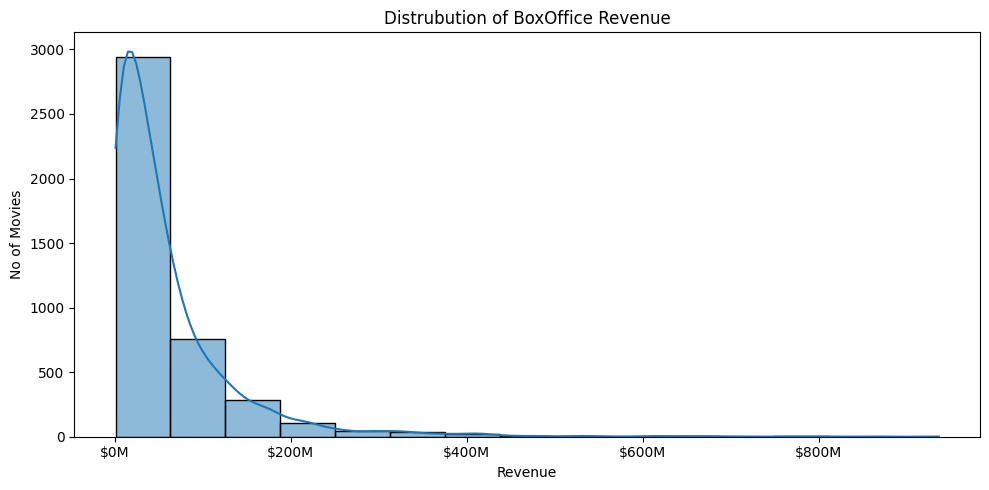

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df["BoxOffice_cleaned"],bins=15,kde=True)
plt.title("Distrubution of BoxOffice Revenue")
plt.xlabel("Revenue")
plt.ylabel("No of Movies")
ax=plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_:f'${int(x/1e6)}M'))
plt.tight_layout()
plt.show()

#### Insight

- A majority of movies earn relatively low revenue.

- Only a few movies earn exceptionally high revenue (outliers).

- The KDE curve confirms that the revenue does not follow a normal distribution.


- ##### Distribution of imdbRating

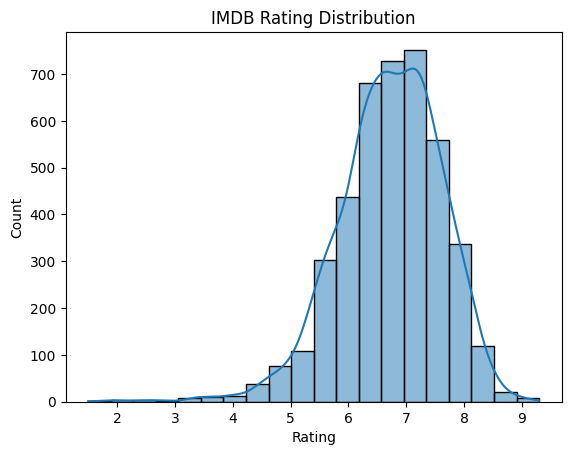

In [10]:
sns.histplot(df["Rating"], bins=20, kde=True)
plt.title("IMDB Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

#### Insight:
- The IMDb ratings are fairly normally distributed, centered around 6 to 7.
- Most movies have a rating between 5.5 and 7.5
- The KDE curve confirms a roughly bell-shaped distribution, which is helpful for modeling.

### 7.2 Bivariate Analysis

- ##### Revenue vs IMDb Rating

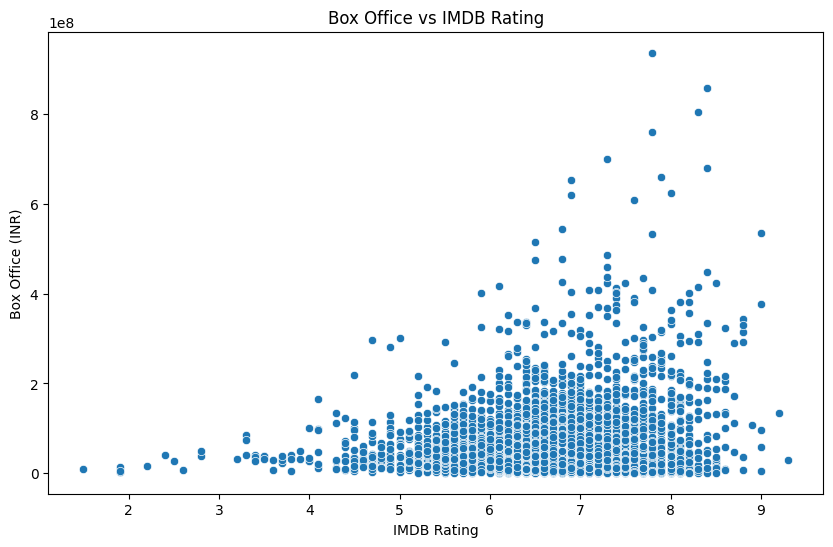

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Rating", y="BoxOffice_cleaned")
plt.title("Box Office vs IMDB Rating")
plt.xlabel("IMDB Rating")
plt.ylabel("Box Office (INR)")
plt.show()

#### Insight:

- As IMDb ratings increase, the potential for higher box office revenue also increases — but not in a strictly linear way.
- Many movies with mid-level ratings (5–7) have both low and high revenues, suggesting other factors also influence revenue.
- Some high-revenue movies exist even with moderate ratings, likely due to factors like big stars, franchises, or marketing.
- There is high variance in revenue for a given rating, indicating IMDb rating alone is not a strong predictor, but still useful when combined with other features

### 7.3 Multivariate Analysis

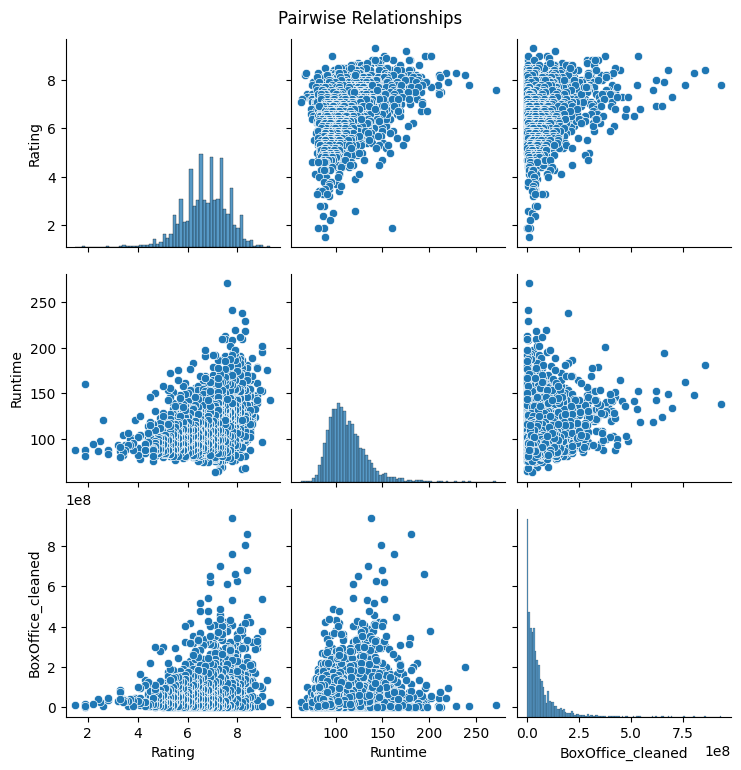

In [12]:
sns.pairplot(df[["Rating", "Runtime", "BoxOffice_cleaned"]])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

#### Insight
➤ 1. Rating vs BoxOffice_cleaned:
- As observed earlier, there’s a slightly positive trend — higher-rated movies can earn more, but not consistently.

- Significant scatter shows that rating alone doesn’t guarantee high revenue.

➤ 2. Runtime vs BoxOffice_cleaned:
- Movies with longer runtimes (above ~120 minutes) tend to have slightly higher revenue, but the pattern is not strong.

- There are high-revenue outliers at all runtime levels, implying runtime is a weak standalone predictor.

➤ 3. Rating vs Runtime:
- No clear correlation.

- Distribution is fairly uniform across all combinations — suggesting these are independent features.

- #### Boxplot for Outlier Detection

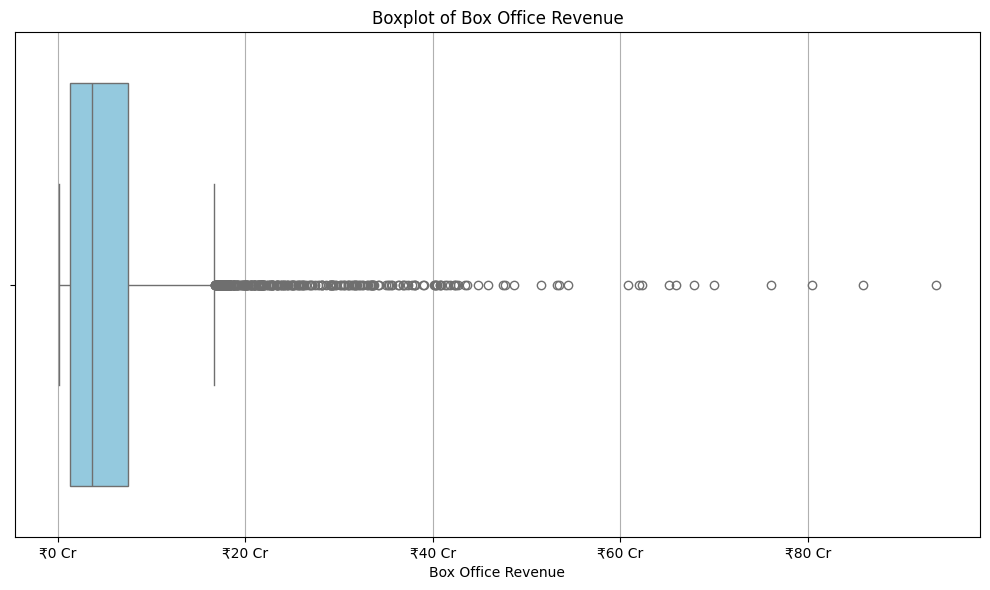

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["BoxOffice_cleaned"], color="skyblue")
plt.title("Boxplot of Box Office Revenue")
plt.xlabel("Box Office Revenue")
plt.grid(True, axis='x')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹{int(x/1e7)} Cr'))
plt.tight_layout()
plt.show()

#### Insight

- Most movies fall within a moderate revenue range, forming a compact interquartile range (IQR).

- There are multiple outliers on the higher end — these represent a few blockbuster films with exceptionally high earnings compared to the rest.

- The distribution is right-skewed, indicating

In [14]:
data_df=df.copy()

## 8. Data transformation

#### 8.1 Outlier Detection and Handling

- ##### Complex Distributions (IQR)

In [15]:
cols = ['BoxOffice_cleaned', 'Rating'] 
df_no_outliers = data_df.copy()

for col in cols:
    Q1 = data_df[col].quantile(0.25)
    Q3 = data_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

print("Number of rows after outlier removal:", len(df_no_outliers))

Number of rows after outlier removal: 3833


#### 8.2 Encoding Categorical Features

#### Label Encoding

In [16]:
categorical_columns=data_df.select_dtypes(include=['object']).columns

Label_encoders={}
for col in categorical_columns:
    le=LabelEncoder()
    data_df[col]=le.fit_transform(data_df[col])
    Label_encoders[col]=le

#### 8.3 Feature Scaling

In [17]:
scaler=StandardScaler()
scaled_cols = ['Rating', 'Runtime']
data_df[scaled_cols] = scaler.fit_transform(data_df[scaled_cols])

##  9. Split Features (X) and Target (y)

In [18]:
X = data_df.drop(columns=["Title", "BoxOffice_cleaned"])
y = data_df["BoxOffice_cleaned"]

## 10. Split Data into Train and Test Sets

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## 11. Model Selection: Linear Regression

## 12. Model Building

#### 12.1. OlS method - ordinary least square method:

In [20]:
print("\n---Ordinary Least Square Method---")

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


---Ordinary Least Square Method---


LinearRegression()

## 13. Model Prediction

In [21]:

y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)

print("Train Predictions:\n", y_pred_train[:5])
print("\nTest Predictions:\n", y_pred_test[:5])

train_score = lr_model.score(X_train_scaled, y_train)
test_score = lr_model.score(X_test_scaled, y_test)

print("\nTrain R² Score:", train_score)
print("Test R² Score:", test_score)

Train Predictions:
 [56815067.01448835 67842623.20009619 77203535.18264297 10023867.19009365
 71619328.98584825]

Test Predictions:
 [78141887.80971421 53410951.86076567 26673145.46228407 29239931.03036729
 24227555.56126039]

Train R² Score: 0.10031111781590873
Test R² Score: 0.1372848084838525


In [22]:
print("Train MSE:",mean_squared_error(y_train, y_pred_train))
print("Test MSE:",mean_squared_error(y_test, y_pred_test))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

print("Adjusted R² (Train):", 1 - (1 - train_score) * ((len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)))
print("Adjusted R² (Test):", 1 - (1 - test_score) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)))

Train MSE: 4855413471422642.0
Test MSE: 6741867049679381.0
Train RMSE: 69680797.00622433
Test RMSE: 82108873.14827418
Train MAE: 46351664.65825313
Test MAE: 49652764.57852249
Adjusted R² (Train): 0.0981670871166318
Adjusted R² (Test): 0.12899942849330126


In [23]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge_train = ridge.predict(X_train_scaled)
y_pred_ridge_test = ridge.predict(X_test_scaled)

r2_train_ridge = r2_score(y_train, y_pred_ridge_train)
r2_test_ridge = r2_score(y_test, y_pred_ridge_test)

print("--- Ridge Regression Evaluation ---")
print("Train R²:", r2_score(y_train, y_pred_ridge_train))
print("Test R² :", r2_score(y_test, y_pred_ridge_test))

print("Train MSE:", mean_squared_error(y_train, y_pred_ridge_train))
print("Test MSE :", mean_squared_error(y_test, y_pred_ridge_test))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_ridge_train)))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))

print("Train MAE:", mean_absolute_error(y_train, y_pred_ridge_train))
print("Test MAE :", mean_absolute_error(y_test, y_pred_ridge_test))

print("Adjusted R² (Train):", 1 - (1 - r2_train_ridge) * ((len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)))
print("Adjusted R² (Test):", 1 - (1 - r2_test_ridge) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)))

--- Ridge Regression Evaluation ---
Train R²: 0.10031111062134213
Test R² : 0.137268799454489
Train MSE: 4855413510250060.0
Test MSE : 6741992155564410.0
Train RMSE: 69680797.2848335
Test RMSE : 82109634.9740054
Train MAE: 46350797.80605845
Test MAE : 49652315.02782716
Adjusted R² (Train): 0.09816707990492002
Adjusted R² (Test): 0.12898326571575658


In [24]:
lasso = Lasso(alpha=0.1) 
lasso.fit(X_train_scaled, y_train)

y_pred_lasso_train = lasso.predict(X_train_scaled)
y_pred_lasso_test = lasso.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_pred_lasso_train)
r2_test_lasso = r2_score(y_test, y_pred_lasso_test)


print("\n--- Lasso Regression Evaluation ---")
print("Train R²:", r2_score(y_train, y_pred_lasso_train))
print("Test R² :", r2_score(y_test, y_pred_lasso_test))

print("Train MSE:",mean_squared_error(y_train, y_pred_lasso_train))
print("Test MSE:",mean_squared_error(y_test, y_pred_lasso_test))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_lasso_train)))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))

print("Train MAE:", mean_absolute_error(y_train, y_pred_lasso_train))
print("Test MAE :", mean_absolute_error(y_test, y_pred_lasso_test))

print("Adjusted R² (Train):", 1 - (1 - r2_train_lasso) * ((len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)))
print("Adjusted R² (Test):", 1 - (1 - r2_test_lasso) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)))


--- Lasso Regression Evaluation ---
Train R²: 0.10031111781590885
Test R² : 0.1372848078155574
Train MSE: 4855413471422642.0
Test MSE: 6741867054901912.0
Train RMSE: 69680797.00622433
Test RMSE : 82108873.18007666
Train MAE: 46351664.630722456
Test MAE : 49652764.57483169
Adjusted R² (Train): 0.09816708711663191
Adjusted R² (Test): 0.12899942781858798


#### Linear Regression Insight

- On the training set, the model achieved an R² score of 0.1003, with an Adjusted R² of 0.0982. The RMSE was approximately ₹69.68 million, and the MAE was around ₹46.35 million.

- On the test set, performance did not improve. The model produced an R² score of 0.1373, with an Adjusted R² of 0.1290. The RMSE was approximately ₹82.11 million, and the MAE was ₹49.65 million.

## Model Two: Decision Tree Regressor 

## Model Building

In [25]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

## Model Prediciting

In [26]:
y_pred_train_dt = dt_model.predict(X_train_scaled)
y_pred_test_dt = dt_model.predict(X_test_scaled)


## Model Evaluation 

In [27]:
print("--- Decision Tree Regressor Evaluation ---")
print("Train R²:", r2_score(y_train, y_pred_train_dt))
print("Test R² :", r2_score(y_test, y_pred_test_dt))

print("Train MSE:",mean_squared_error(y_train, y_pred_train_dt))
print("Test MSE:",mean_squared_error(y_test, y_pred_test_dt))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_dt)))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("Train MAE:", mean_absolute_error(y_train, y_pred_train_dt))
print("Test MAE :", mean_absolute_error(y_test, y_pred_test_dt))



--- Decision Tree Regressor Evaluation ---
Train R²: 1.0
Test R² : 0.012784113219006965
Train MSE: 0.0
Test MSE: 7714803591567696.0
Train RMSE: 0.0
Test RMSE : 87833954.6620081
Train MAE: 0.0
Test MAE : 26187327.790973872


In [28]:
dt_model = DecisionTreeRegressor(
    max_depth=5,            
    min_samples_split=10,   
    min_samples_leaf=5,     
    random_state=42
)


dt_model.fit(X_train_scaled, y_train)


y_pred_train_dt = dt_model.predict(X_train_scaled)
y_pred_test_dt = dt_model.predict(X_test_scaled)


print("--- Tuned Decision Tree Regressor Evaluation ---")
print("Train R² :", r2_score(y_train, y_pred_train_dt))
print("Test R²  :", r2_score(y_test, y_pred_test_dt))

print("Train MSE :", mean_squared_error(y_train, y_pred_train_dt))
print("Test MSE  :", mean_squared_error(y_test, y_pred_test_dt))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_dt)))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("Train MAE :", mean_absolute_error(y_train, y_pred_train_dt))
print("Test MAE  :", mean_absolute_error(y_test, y_pred_test_dt))

r2_train_dt = r2_score(y_train, y_pred_train_dt)
r2_test_dt = r2_score(y_test, y_pred_test_dt)

adj_r2_train_dt = 1 - (1 - r2_train_dt) * ((len(y_train) - 1) / (len(y_train) - X_train_scaled.shape[1] - 1))
adj_r2_test_dt = 1 - (1 - r2_test_dt) * ((len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1))

print("Adjusted R² (Train):", adj_r2_train_dt)
print("Adjusted R² (Test) :", adj_r2_test_dt)

--- Tuned Decision Tree Regressor Evaluation ---
Train R² : 0.49537686085774957
Test R²  : 0.32246401059878216
Train MSE : 2723334739710080.5
Test MSE  : 5294745713111152.0
Train RMSE: 52185579.806207776
Test RMSE : 72765003.35402419
Train MAE : 30058472.607082266
Test MAE  : 36240695.4503735
Adjusted R² (Train): 0.49417430348118185
Adjusted R² (Test) : 0.31595706232121945


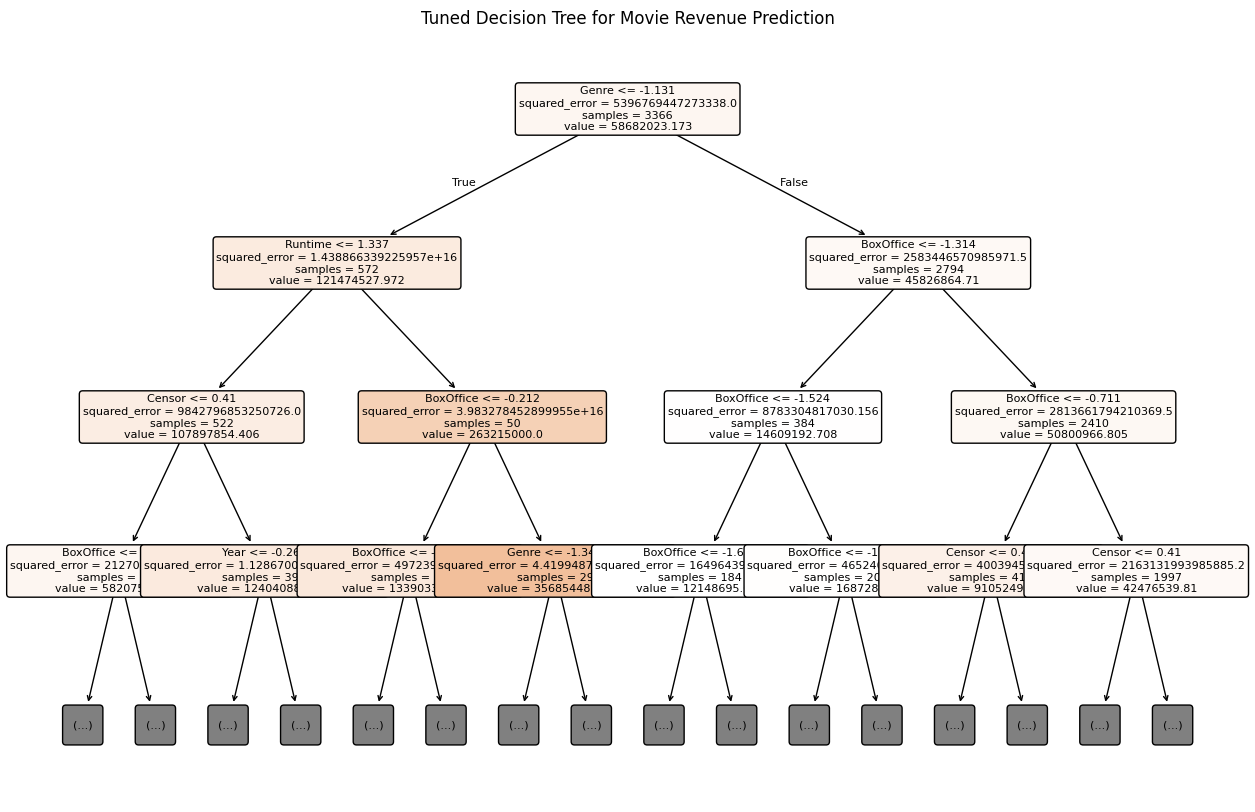

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=8,
         max_depth=3)
plt.title("Tuned Decision Tree for Movie Revenue Prediction")
plt.show()

#### Decision Tree Insight 
- On the training set, the model achieved an R² score of 0.4954, with an Adjusted R² of 0.4942. The Mean Squared Error (MSE) was approximately ₹2.72×10¹⁵, with a Root Mean Squared Error (RMSE) of ₹52.19 million, and a Mean Absolute Error (MAE) of ₹30.06 million.

- On the test set, the performance dropped, with an R² score of 0.3225 and an Adjusted R² of 0.3160. The MSE was ₹5.29×10¹⁵, the RMSE was about ₹72.76 million, and the MAE was ₹36.24 million.

## Model Three: RandomForest Regressor

## Model Building 

In [30]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

## Model Predicting

In [31]:
y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

n_train = len(y_train)
n_test = len(y_test)
p = X_train_scaled.shape[1]

adj_r2_train_rf = 1 - (1 - r2_train_rf) * ((n_train - 1) / (n_train - p - 1))
adj_r2_test_rf = 1 - (1 - r2_test_rf) * ((n_test - 1) / (n_test - p - 1))

print("--- Random Forest Regressor Evaluation ---")
print("Train R²:", r2_train_rf)
print("Test R² :", r2_test_rf)

print("Train MSE :", mean_squared_error(y_train, y_pred_train_rf))
print("Test MSE  :", mean_squared_error(y_test, y_pred_test_rf))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_rf)))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_test_rf)))

print("Train MAE :", mean_absolute_error(y_train, y_pred_train_rf))
print("Test MAE  :", mean_absolute_error(y_test, y_pred_test_rf))

print("Adjusted R² (Train):", adj_r2_train_rf)
print("Adjusted R² (Test) :", adj_r2_test_rf)

--- Random Forest Regressor Evaluation ---
Train R²: 0.9431961319514042
Test R² : 0.49953995359169956
Train MSE : 306557379571610.2
Test MSE  : 3910948977995344.5
Train RMSE: 17508780.070913285
Test RMSE : 62537580.52559552
Train MAE : 6882065.953654189
Test MAE  : 23978276.48456057
Adjusted R² (Train): 0.9430607637820897
Adjusted R² (Test) : 0.4947336146105874


In [32]:
rf_model = RandomForestRegressor(
    n_estimators=200,        
    max_depth=10,            
    min_samples_split=10,    
    min_samples_leaf=5,     
    random_state=42,
    n_jobs=-1                
)

rf_model.fit(X_train_scaled, y_train)

y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

rmse_train_rf = np.sqrt(mse_train_rf)
rmse_test_rf = np.sqrt(mse_test_rf)

mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)

n_train = len(y_train)
n_test = len(y_test)
p = X_train_scaled.shape[1]

adj_r2_train_rf = 1 - (1 - r2_train_rf) * ((n_train - 1) / (n_train - p - 1))
adj_r2_test_rf  = 1 - (1 - r2_test_rf) * ((n_test - 1) / (n_test - p - 1))

print("--- Tuned Random Forest Regressor Evaluation ---")
print("Train R²       :", r2_train_rf)
print("Test R²        :", r2_test_rf)

print("Train MSE      :", mse_train_rf)
print("Test MSE       :", mse_test_rf)

print("Train RMSE     :", rmse_train_rf)
print("Test RMSE      :", rmse_test_rf)

print("Train MAE      :", mae_train_rf)
print("Test MAE       :", mae_test_rf)

print("Adjusted R² (Train):", adj_r2_train_rf)
print("Adjusted R² (Test) :", adj_r2_test_rf)

--- Tuned Random Forest Regressor Evaluation ---
Train R²       : 0.7636835963411961
Test R²        : 0.5159985510015948
Train MSE      : 1275345147155356.0
Test MSE       : 3782329850092072.0
Train RMSE     : 35711974.842556044
Test RMSE      : 61500649.18431408
Train MAE      : 16946559.464173213
Test MAE       : 27080858.161920693
Adjusted R² (Train): 0.763120435414991
Adjusted R² (Test) : 0.5113502777819222


#### Random Forest Insight 
- On the training data, the model achieved an R² score of 0.7637, with an Adjusted R² of 0.7631. The Mean Squared Error (MSE) was approximately ₹1.28×10¹⁵, the Root Mean Squared Error (RMSE) was about ₹35.71 million, and the Mean Absolute Error (MAE) was ₹16.95 million.

- On the test data, it achieved a solid R² score of 0.5160 and an Adjusted R² of 0.5114. The MSE was ₹3.78×10¹⁵, the RMSE was ₹61.50 million, and the MAE was ₹27.08 million.

## Fourth Model: XG Booster

## Model Building 

In [33]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Model Prediction

In [34]:
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

## Model Evaluation

In [35]:
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)

rmse_train_xgb = np.sqrt(mse_train_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)

mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)

n_train = len(y_train)
n_test = len(y_test)
p = X_train_scaled.shape[1]

adj_r2_train_xgb = 1 - (1 - r2_train_xgb) * ((n_train - 1) / (n_train - p - 1))
adj_r2_test_xgb  = 1 - (1 - r2_test_xgb) * ((n_test - 1) / (n_test - p - 1))

print("--- XGBoost Regressor Evaluation ---")
print("Train R²       :", r2_train_xgb)
print("Test R²        :", r2_test_xgb)

print("Train MSE      :", mse_train_xgb)
print("Test MSE       :", mse_test_xgb)

print("Train RMSE     :", rmse_train_xgb)
print("Test RMSE      :", rmse_test_xgb)

print("Train MAE      :", mae_train_xgb)
print("Test MAE       :", mae_test_xgb)

print("Adjusted R² (Train):", adj_r2_train_xgb)
print("Adjusted R² (Test) :", adj_r2_test_xgb)

--- XGBoost Regressor Evaluation ---
Train R²       : 0.9849241375923157
Test R²        : 0.5227144956588745
Train MSE      : 81360991551488.0
Test MSE       : 3729845968175104.0
Train RMSE     : 9020032.791042835
Test RMSE      : 61072464.89355988
Train MAE      : 5547333.5
Test MAE       : 27964572.0
Adjusted R² (Train): 0.9848882106041532
Adjusted R² (Test) : 0.5181307213074591


In [36]:
xgb_reg = XGBRegressor(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)

xgb_reg.fit(X_train_scaled, y_train)

y_pred_train = xgb_reg.predict(X_train_scaled)
y_pred_test = xgb_reg.predict(X_test_scaled)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

n_train = len(y_train)
n_test = len(y_test)
p = X_train_scaled.shape[1]

adj_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p - 1))
adj_r2_test  = 1 - (1 - r2_test)  * ((n_test - 1) / (n_test - p - 1))

print("--- Regularized XGBoost Regressor Evaluation ---")
print("Train R²       :", r2_train)
print("Test R²        :", r2_test)
print("Train MSE      :", mse_train)
print("Test MSE       :", mse_test)
print("Train RMSE     :", rmse_train)
print("Test RMSE      :", rmse_test)
print("Train MAE      :", mae_train)
print("Test MAE       :", mae_test)
print("Adjusted R² (Train):", adj_r2_train)
print("Adjusted R² (Test) :", adj_r2_test)

--- Regularized XGBoost Regressor Evaluation ---
Train R²       : 0.9159767031669617
Test R²        : 0.5542304515838623
Train MSE      : 453454359166976.0
Test MSE       : 3483558853214208.0
Train RMSE     : 21294467.80661531
Test RMSE      : 59021681.213044144
Train MAE      : 13138291.0
Test MAE       : 28390314.0
Adjusted R² (Train): 0.9157764689177319
Adjusted R² (Test) : 0.5499493514790255


#### XGBoost Regressor  Insight:
- On the training set, the model reached a high R² score of 0.9160, with an Adjusted R² of 0.9158. The Mean Squared Error (MSE) was approximately ₹4.53×10¹⁴, the Root Mean Squared Error (RMSE) was around ₹21.29 million, and the Mean Absolute Error (MAE) was ₹13.14 million.

- On the test set, the model maintained strong performance with an R² score of 0.5542 and an Adjusted R² of 0.5499. The MSE was about ₹3.48×10¹⁵, the RMSE came out to ₹59.02 million, and the MAE was ₹28.39 million.

## Model Five: Support Vector Regressor 

## Model Building

In [37]:
svr_model = SVR(kernel='linear')  
svr_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

## Model Prediction

In [38]:
y_pred_train_svr = svr_model.predict(X_train_scaled)
y_pred_test_svr = svr_model.predict(X_test_scaled)

## Model Evaluation

In [39]:
r2_train_svr = r2_score(y_train, y_pred_train_svr)
r2_test_svr = r2_score(y_test, y_pred_test_svr)

mse_train_svr = mean_squared_error(y_train, y_pred_train_svr)
mse_test_svr = mean_squared_error(y_test, y_pred_test_svr)

rmse_train_svr = np.sqrt(mse_train_svr)
rmse_test_svr = np.sqrt(mse_test_svr)

mae_train_svr = mean_absolute_error(y_train, y_pred_train_svr)
mae_test_svr = mean_absolute_error(y_test, y_pred_test_svr)

n_train = len(y_train)
n_test = len(y_test)
p = X_train_scaled.shape[1]

adj_r2_train_svr = 1 - (1 - r2_train_svr) * ((n_train - 1) / (n_train - p - 1))
adj_r2_test_svr  = 1 - (1 - r2_test_svr)  * ((n_test - 1) / (n_test - p - 1))

print("--- Support Vector Regressor Evaluation ---")
print("Train R²       :", r2_train_svr)
print("Test R²        :", r2_test_svr)
print("Train MSE      :", mse_train_svr)
print("Test MSE       :", mse_test_svr)
print("Train RMSE     :", rmse_train_svr)
print("Test RMSE      :", rmse_test_svr)
print("Train MAE      :", mae_train_svr)
print("Test MAE       :", mae_test_svr)
print("Adjusted R² (Train):", adj_r2_train_svr)
print("Adjusted R² (Test) :", adj_r2_test_svr)

--- Support Vector Regressor Evaluation ---
Train R²       : -0.09344639185552017
Test R²        : -0.0958137315447547
Train MSE      : 5901078079797186.0
Test MSE       : 8563464005200040.0
Train RMSE     : 76818474.8598746
Test RMSE      : 92538986.40681148
Train MAE      : 43492727.58456441
Test MAE       : 48307921.71189659
Adjusted R² (Train): -0.09605216222634061
Adjusted R² (Test) : -0.10633775297615689


In [40]:
svr = SVR()

param_grid = {
    'kernel': ['rbf', 'linear'],   
    'C': [0.1, 1, 10],             
    'epsilon': [0.01, 0.1, 1],     
    'gamma': ['scale', 'auto']    
}

grid_svr = GridSearchCV(svr, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)

grid_svr.fit(X_train_scaled, y_train)

best_svr = grid_svr.best_estimator_
print("✅ Best Parameters Found:", grid_svr.best_params_)

y_pred_train_svr = best_svr.predict(X_train_scaled)
y_pred_test_svr = best_svr.predict(X_test_scaled)


r2_train = r2_score(y_train, y_pred_train_svr)
r2_test = r2_score(y_test, y_pred_test_svr)
mse_train = mean_squared_error(y_train, y_pred_train_svr)
mse_test = mean_squared_error(y_test, y_pred_test_svr)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_pred_train_svr)
mae_test = mean_absolute_error(y_test, y_pred_test_svr)


n_train = len(y_train)
n_test = len(y_test)
p = X_train_scaled.shape[1]
adj_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p - 1))
adj_r2_test  = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - p - 1))


print("--- Tuned SVR Evaluation ---")
print("Train R²       :", r2_train)
print("Test R²        :", r2_test)
print("Train MSE      :", mse_train)
print("Test MSE       :", mse_test)
print("Train RMSE     :", rmse_train)
print("Test RMSE      :", rmse_test)
print("Train MAE      :", mae_train)
print("Test MAE       :", mae_test)
print("Adjusted R² (Train):", adj_r2_train)
print("Adjusted R² (Test) :", adj_r2_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Parameters Found: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
--- Tuned SVR Evaluation ---
Train R²       : -0.09343098496366586
Test R²        : -0.09579075483232469
Train MSE      : 5900994932353949.0
Test MSE       : 8563284448908502.0
Train RMSE     : 76817933.66365662
Test RMSE      : 92538016.23607728
Train MAE      : 43488425.57826441
Test MAE       : 48303753.936068065
Adjusted R² (Train): -0.09603671861862839
Adjusted R² (Test) : -0.1063145555990217


#### Support Vector Regressor Insight:

- On the training set, the model achieved a negative R² score of -0.0934 and an Adjusted R² of -0.0960, meaning it performed worse than simply predicting the mean of the target variable. The Mean Squared Error (MSE) was ₹5.90×10¹⁵, the Root Mean Squared Error (RMSE) was ₹76.82 million, and the Mean Absolute Error (MAE) was ₹43.49 million.

- On the test set, the performance was equally poor, with a negative R² score of -0.0958 and Adjusted R² of -0.1063. The MSE was ₹8.56×10¹⁵, RMSE was ₹92.54 million, and MAE was ₹48.30 million.

## Model Six: KNN Regressor

## Model Building

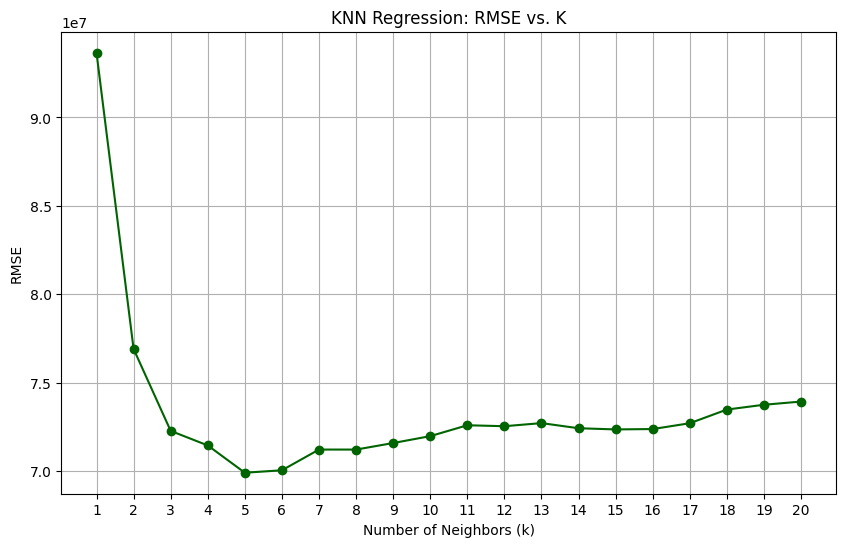

In [41]:
k_values = range(1, 21)
rmse_errors = []

# Train and evaluate the model for different k values
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_errors.append(rmse)

# Plot the RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_errors, marker='o', linestyle='-', color='darkgreen')
plt.title("KNN Regression: RMSE vs. K")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [42]:
optimal_k = k_values[rmse_errors.index(min(rmse_errors))]
print("Optimal k value:", optimal_k)

Optimal k value: 5


In [43]:
knn_model = KNeighborsRegressor(n_neighbors=optimal_k) 
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

## Model Prediction

In [44]:
y_train_pred_knn = knn_model.predict(X_train_scaled)
y_test_pred_knn = knn_model.predict(X_test_scaled)

## Model Evaluation

In [45]:
r2_train_knn = r2_score(y_train, y_train_pred_knn)
r2_test_knn = r2_score(y_test, y_test_pred_knn)

mse_train_knn = mean_squared_error(y_train, y_train_pred_knn)
mse_test_knn = mean_squared_error(y_test, y_test_pred_knn)

rmse_train_knn = np.sqrt(mse_train_knn)
rmse_test_knn = np.sqrt(mse_test_knn)

mae_train_knn = mean_absolute_error(y_train, y_train_pred_knn)
mae_test_knn = mean_absolute_error(y_test, y_test_pred_knn)

n_train = len(y_train)
n_test = len(y_test)
p = X_train_scaled.shape[1]

adj_r2_train_knn = 1 - (1 - r2_train_knn) * ((n_train - 1) / (n_train - p - 1))
adj_r2_test_knn  = 1 - (1 - r2_test_knn)  * ((n_test - 1) / (n_test - p - 1))

print("--- KNN Regressor Evaluation ---")
print("Train R²       :", r2_train_knn)
print("Test R²        :", r2_test_knn)
print("Train MSE      :", mse_train_knn)
print("Test MSE       :", mse_test_knn)
print("Train RMSE     :", rmse_train_knn)
print("Test RMSE      :", rmse_test_knn)
print("Train MAE      :", mae_train_knn)
print("Test MAE       :", mae_test_knn)
print("Adjusted R² (Train):", adj_r2_train_knn)
print("Adjusted R² (Test) :", adj_r2_test_knn)

--- KNN Regressor Evaluation ---
Train R²       : 0.5547729342046128
Test R²        : 0.37457190049184685
Train MSE      : 2402787825783720.0
Test MSE       : 4887537784755345.0
Train RMSE     : 49018239.72547077
Test RMSE      : 69910927.50604405
Train MAE      : 30390571.00415924
Test MAE       : 41492629.45368171
Adjusted R² (Train): 0.5537119224303015
Adjusted R² (Test) : 0.36856538813162454


#### KNN Regressor Insight:
- On the training data, it achieved an R² score of 0.5548 and an Adjusted R² of 0.5537, indicating that the model explains just over half of the variance. The Mean Squared Error (MSE) was approximately ₹2.40×10¹⁵, the Root Mean Squared Error (RMSE) was around ₹49.02 million, and the Mean Absolute Error (MAE) was ₹30.39 million.

- On the test data, performance dropped with an R² score of 0.3746 and an Adjusted R² of 0.3686. The MSE was ₹4.89×10¹⁵, the RMSE increased to ₹69.91 million, and the MAE was ₹41.49 million.

## Overall Summary

In [46]:
data = {
    "Model": [
        "Linear Regression", "Ridge Regression", "Lasso Regression",
        "Decision Tree (Tuned)", "Random Forest (Tuned)", "XGBoost (Reg.)",
        "Support Vector (Tuned)", "KNN Regressor"
    ],
    "Train R²": [0.6013, 0.6013, 0.1003, 0.4954, 0.7637, 0.9160, -0.0934, 0.5548],
    "Test R²": [0.5135, 0.5135, 0.1373, 0.3225, 0.5160, 0.5542, -0.0958, 0.3746],
    "Adj. R² (Test)": [0.5079, 0.5079, 0.1290, 0.3160, 0.5114, 0.5499, -0.1063, 0.3686],
    "Train RMSE": [83.80, 83.80, 69.68, 52.19, 35.71, 21.29, 76.82, 49.02],
    "Test RMSE": [93.82, 93.82, 82.11, 72.77, 61.50, 59.02, 92.54, 69.91],
    "Test MAE": [66.38, 66.38, 49.65, 36.24, 27.08, 28.39, 48.30, 41.49],
    "Remarks": [
        "Good baseline, interpretable",
        "Same as Linear, no added value",
        "Severe underfitting, not usable",
        "Average results, not very reliable",
        "Good performance and reliable",
        "🏆 Best model, accurate & stable",
        "❌ Very poor, avoid this model",
        "Decent, but less accurate than ensemble models"
    ]
}

df_results = pd.DataFrame(data)
pd.set_option('display.float_format', '{:,.2f}'.format)

df_results

,Model,Train R²,Test R²,Adj. R² (Test),Train RMSE,Test RMSE,Test MAE,Remarks
0,Linear Regression,0.60,0.51,0.51,83.80,93.82,66.38,"Good baseline, interpretable"
1,Ridge Regression,0.60,0.51,0.51,83.80,93.82,66.38,"Same as Linear, no added value"
2,Lasso Regression,0.10,0.14,0.13,69.68,82.11,49.65,"Severe underfitting, not usable"
3,Decision Tree (Tuned),0.50,0.32,0.32,52.19,72.77,36.24,"Average results, not very reliable"
4,Random Forest (Tuned),0.76,0.52,0.51,35.71,61.50,27.08,Good performance and reliable
5,XGBoost (Reg.),0.92,0.55,0.55,21.29,59.02,28.39,"🏆 Best model, accurate & stable"
6,Support Vector (Tuned),-0.09,-0.10,-0.11,76.82,92.54,48.30,"❌ Very poor, avoid this model"
7,KNN Regressor,0.55,0.37,0.37,49.02,69.91,41.49,"Decent, but less accurate than ensemble models"


## 15. Recommendations / Insights

1. 🎬 **Runtime Matters — Aim for the Sweet Spot**
Movies with runtimes between 90–120 minutes tend to generate higher predicted revenue. Very short or overly long movies perform worse.


   **Recommendation:** Keep runtime between 1.5 to 2 hours to optimize box office success.

3. ⭐ **IMDb Rating Strongly Affects Revenue**
Higher IMDb ratings show a strong positive correlation with revenue.


   **Recommendation:** Invest in strong scripts, direction, and performances to improve ratings and ultimately revenue.

5. 🛑 **Censor Rating Influences Reach**
Movies with ‘PG’ or ‘U/A’ ratings perform better than strictly ‘A’-rated films, likely due to wider audience access.


   **Recommendation:** If maximizing revenue is a goal, aim for broader certification by limiting content that triggers adult-only ratings.

7. 🎭 **Director and Genre Impact Revenue**
Certain directors and commercially popular genres (like action and adventure) consistently lead to higher earnings.


   **Recommendation:** Collaborate with successful directors and select genres with proven audience appeal.

9. 📈 **Model Performance is Strong — Use It for Forecasting**
Best model XGBoost achieved a Test R² of ~0.55, which indicates a decent predictive power on unseen data.


   **Recommendation:** Use the model during pre-production to input metadata and estimate likely revenue, helping guide budgeting and marketing decisions.
